In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('results.csv')

In [12]:
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,2.50250,3.35270,2.24330,0.41873,0.13294,0.16074,0.10000,1.5978,2.7632,1.7148,0.070316,0.003298,0.003298
1,1,1.69490,2.40370,1.63500,0.39887,0.17822,0.19792,0.11161,1.6002,2.4535,1.7155,0.040294,0.006610,0.006610
2,2,1.57790,2.31520,1.52390,0.28105,0.19915,0.17353,0.05717,2.3724,7.2309,2.8943,0.010250,0.009899,0.009899
3,3,1.52570,2.27580,1.48080,0.34320,0.18069,0.18372,0.10610,1.6124,2.8207,1.6676,0.009901,0.009901,0.009901
4,4,1.45610,2.19410,1.43290,0.41706,0.16017,0.17060,0.08348,1.9862,2.5930,2.1033,0.009901,0.009901,0.009901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,0.74866,0.62189,1.00330,0.38380,0.15821,0.17054,0.12270,1.4091,3.1672,1.6000,0.006469,0.006469,0.006469
109,109,0.74643,0.61452,0.99958,0.39944,0.15592,0.16949,0.12255,1.4223,3.2365,1.6117,0.006436,0.006436,0.006436
110,110,0.74266,0.60911,0.99882,0.42087,0.15367,0.16967,0.12322,1.4230,3.2456,1.6131,0.006403,0.006403,0.006403
111,111,0.73689,0.60291,0.99356,0.36776,0.15955,0.16898,0.12226,1.4510,3.2539,1.6482,0.006370,0.006370,0.006370


In [15]:
epochs = df['                  epoch']
precision = df['       metrics/mAP50(B)']

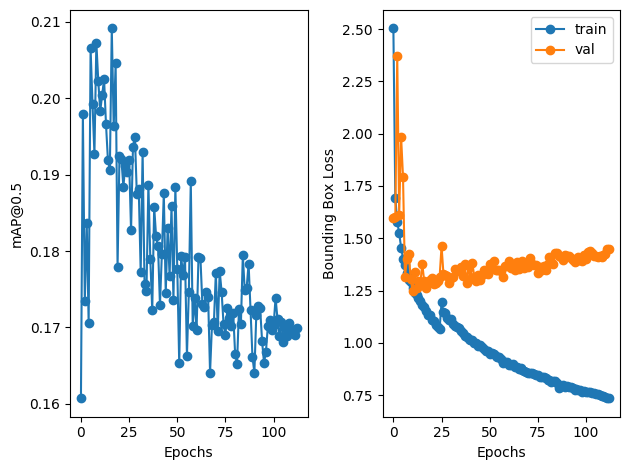

In [23]:
plt.subplot(1, 2, 1)
plt.plot(epochs, precision, '-o')
plt.xlabel('Epochs')
plt.ylabel('mAP@0.5')

plt.subplot(1, 2, 2)
plt.plot(df['                  epoch'], df['         train/box_loss'], '-o', label='train')
plt.plot(df['                  epoch'], df['           val/box_loss'], '-o', label='val')
plt.xlabel('Epochs')
plt.ylabel('Bounding Box Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
import json
metrics = []
with open('metrics.json', 'r') as file:
    for line in file:
        metrics.append(json.loads(line))

In [28]:
metrics

[{'data_time': 0.02569559500034302,
  'fast_rcnn/cls_accuracy': 0.68701171875,
  'fast_rcnn/false_negative': 0.5157894736842106,
  'fast_rcnn/fg_cls_accuracy': 0.4842105263157895,
  'iteration': 2,
  'loss_box_reg': 0.037747740745544434,
  'loss_cls': 0.6344541907310486,
  'loss_rpn_cls': 1.2330238819122314,
  'loss_rpn_loc': 0.13931584358215332,
  'lr': 2.998e-06,
  'roi_head/num_bg_samples': 502.5,
  'roi_head/num_fg_samples': 9.5,
  'rpn/num_neg_anchors': 221.5,
  'rpn/num_pos_anchors': 34.5,
  'time': 0.733516511000289,
  'total_loss': 2.0365555975586176},
 {'eta_seconds': 111418.2239548999, 'iteration': 3},
 {'data_time': 0.10503388899974198,
  'eta_seconds': 119659.0769365522,
  'fast_rcnn/cls_accuracy': 0.8819580078125,
  'fast_rcnn/false_negative': 0.984920634920635,
  'fast_rcnn/fg_cls_accuracy': 0.015079365079365078,
  'iteration': 19,
  'loss_box_reg': 0.06529174000024796,
  'loss_cls': 0.5430289208889008,
  'loss_rpn_cls': 0.7937927842140198,
  'loss_rpn_loc': 0.07089934498

In [64]:
losses = []
iters = []
for log in metrics:
    if 'loss_box_reg' in log:
        losses.append(log['loss_box_reg'])
        iters.append(log['iteration'])

n=9
iters = [x * (8 / 6079) for x in iters]
losses = [sum(losses[i:i+n])/n for i in range(0, len(losses), n)]
iters = [sum(iters[i:i+n])/n for i in range(0, len(iters), n)]

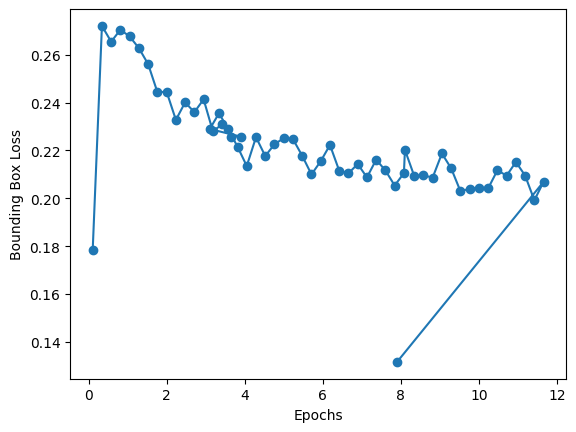

In [65]:
plt.plot(iters, losses, '-o')
plt.xlabel('Epochs')
plt.ylabel('Bounding Box Loss')
plt.show()